![f](Pictures_repo/Cover_presentation.png)

In [1]:
import json
import sys

# Import local functions:
from fun.getLabel import getLabel
from fun.edit_yaml_from_ontology import edit

# Path to the local repository: 
sys.path.append("C:/SWE_LOCAL/Task32/Lidar_ontology/Example_coding_efficiency/LidarOntologyConceptsRepo/Extract-lidar-ontology-concepts/fun/") 

Define the fields we want to work with and where we want to store it:

In [2]:
Preferred_Label,Alternative_Label,Definition='','',''
Lidar_Dictionary = {}

In [3]:
SelIdiom=input('Language? ') # "English", "Spanish", "Chinese" or "Italian"

Language? Spanish


## Downloading the lidar concept!


**Step 1**. Visit https://data.windenergy.dtu.dk/ontologies/view/ontolidar/en/

**Step 2**. Click on the ontology concept you are interested in downloading
<div style="max-width:1000px;margin-left: 0px; margin-right:200px;margin-top: 20px; margin-bottom:50px;">
<img src="Pictures_repo/Fig1.png" width="800px"/>
</div>

**Step 3**. Scroll down and click on ```Download this concept```
<div style="max-width:1000px;margin-left: 0px; margin-right:410px;margin-top: 20px; margin-bottom:50px;">
<img src="Pictures_repo/Fig2.png" width="750px"/>
</div>

**Step 4**. Save the concept 
<div style="max-width:400px;margin-left: 0px; margin-right:auto;margin-top: 20px; margin-bottom:50px;">
<img src="./Pictures_repo/Fig3.png" width="700px"/>
</div>

### Velocity azimuth display
Let's have a look to the data

In [4]:
# Open the file that users download from (https://data.windenergy.dtu.dk/ontologies/view/ontolidar/en/)
with open(r'.\Ontology_Concepts\VAD_da', encoding='utf-8') as f:
    d = json.load(f)

print(d)

import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(d)

{'@context': {'skos': 'http://www.w3.org/2004/02/skos/core#', 'isothes': 'http://purl.org/iso25964/skos-thes#', 'rdfs': 'http://www.w3.org/2000/01/rdf-schema#', 'owl': 'http://www.w3.org/2002/07/owl#', 'dct': 'http://purl.org/dc/terms/', 'dc11': 'http://purl.org/dc/elements/1.1/', 'uri': '@id', 'type': '@type', 'lang': '@language', 'value': '@value', 'graph': '@graph', 'label': 'rdfs:label', 'prefLabel': 'skos:prefLabel', 'altLabel': 'skos:altLabel', 'hiddenLabel': 'skos:hiddenLabel', 'broader': 'skos:broader', 'narrower': 'skos:narrower', 'related': 'skos:related', 'inScheme': 'skos:inScheme', 'exactMatch': 'skos:exactMatch', 'closeMatch': 'skos:closeMatch', 'broadMatch': 'skos:broadMatch', 'narrowMatch': 'skos:narrowMatch', 'relatedMatch': 'skos:relatedMatch'}, 'graph': [{'uri': 'http://vocab.ieawindtask32.org/wind-lidar-ontology/', 'type': 'skos:ConceptScheme', 'prefLabel': {'lang': 'en', 'value': 'IEA Wind Task 32 Wind Lidar Ontology'}}, {'uri': 'http://vocab.ieawindtask32.org/wind

## Extract data
- ``skos:definition``
- ``prefLabel``
- ``altLabel`` 

Users are able to extract other elements by replacing label keys

**Step 1**. Find the path to the data (dictionary keys):

In [5]:
index_inScheme=1
m=d['graph'][index_inScheme].keys()
while 'inScheme' not in m:
    index_inScheme+=1
    m=d['graph'][index_inScheme].keys()
print(m)

dict_keys(['uri', 'type', 'altLabel', 'broader', 'skos:definition', 'skos:editorialNote', 'inScheme', 'prefLabel'])


**Step 2**. Get definition of the lidar concept provided by the lidar ontology

In [6]:
# path to the working directory

path = r'./Ontology_Concepts/VAD_da' 

# get individual key value pairs depending on the key requested
Definition        = getLabel(path, key="skos:definition", lang='en', index_inScheme=1)
Alternative_Label = getLabel(path, key = "altLabel", lang='en', index_inScheme=1)

#Save in a new dictionary
Lidar_Dictionary['Definition']=Definition
Lidar_Dictionary['Alternative Label']=Alternative_Label
print('Definition: '+Definition)
print('Alternative label:' + Alternative_Label)

Definition: VAD is a method of analyzing data from a complete conical scan whereby many closely spaced azimuthal points may be sampled by the lidar, and the data are used to estimate the wind speed at each height using a statistical fitting method.
Alternative label:VAD


## What to do with these data? 

Connect with local resources:
- input for a lidar simulator
- Databases
- Speed up data analysis

### Example: 
Input for a lidar simulator

<div style="max-width:1000px;margin-left: 0px; margin-right:200px;margin-top: 20px; margin-bottom:50px;">
<img src="Pictures_repo/Yaml_local.png" width="800px"/>
</div>

__1)__ Select our lidar simulator local template

In [7]:
local_yaml = './Ontology_yml.yml'

__2)__ Select the lidar concept to be edited

In [8]:
tag = 'Velocity azimuth display'

__3)__ Select the variable to be edited 

In [12]:
fields2change = ['Definition','Alternative Label']

__4)__ Edit the local yaml file

The `edit_yaml_from_ontology.edit` function reads the user's lidar input template, finds and edits items and saves the updated yaml file. Gives priority to the information contained in the yaml file.

In [13]:
edit(local_yaml,tag,fields2change,Lidar_Dictionary) 

<div style="max-width:1000px;margin-left: 0px; margin-right:200px;margin-top: 20px; margin-bottom:50px;">
<img src="Pictures_repo/Yaml_edited.png" width="800px"/>
</div>

To end with we need to talk about how does your working group address the overall theme of the task “Large-Scale Deployment of Wind Lidar”?

Desing and use of lidar
- Manufacture
- Deployment, operation and test
- Maintenance
- Speed up data analysis

Lidar task-specific optimization
- Lidar assisted wind turbine control 
- Pre- and post- campaign preparation

Market acceptance
- IEC standards
 -Safety protocols

With this ontology we make available a common CV that unambiguously defines the many aspects of a wind lidar.  The ontology can be used to help transfer data, tools, and knowledge. 

Avoid lidar black boxes
Reduce the possibilities for innovation
Sharing data and resources (code or template for a lidar simulator)
Safety : Lidar safety class for public purposes
IEC definitions
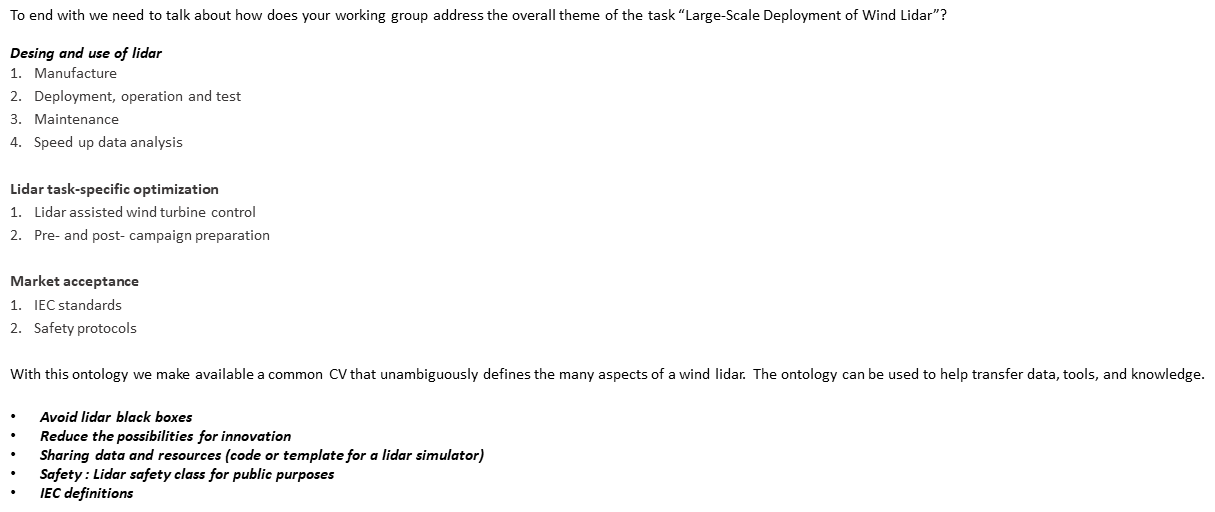

## Contact us

- C. Ratti – carloar@enlightenergy.eu
- D. Liu – liu@ifb.uni-stuttgart.de
- A. Clifton – andy.clifton@enviconnect.de
- A. Keane – aidan.keane@woodplc.com
- A. Giyanani – ashim.giyanani@iwes.fraunhofer.de
- F. Costa – costa@ifb.uni-stuttgart.de
